<a href="https://colab.research.google.com/github/atracordis/projet-stats-cnam-titanic/blob/main/Python_Projet_STA201_Wajd_Meskini_Kaouther_Makhlouf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lecture et analyse globale


In [2]:
!python --version

Python 3.11.12


On essaye d'abord de contrôler l'aléa en forçant les nombres pseudos-aléatoires de partir du même nombre (et donc de générer toujours les mêmes suites). En effet, pour garantir la reproductibilité des expériences, il est essentiel de fixer une "seed" (graine) car de nombreux processus (initialisation des poids, tirages aléatoires pour le découpage des données, choix des indices dans la validation croisée) reposent sur la génération de nombres pseudo-aléatoires.

Sans seed, chaque exécution produit des résultats différents, rendant impossible la comparaison fiable des performances du modèle ou la vérification des modifications apportées. En fixant une seed, on s’assure que tous les tirages aléatoires suivent la même séquence à chaque exécution, ce qui permet de reproduire exactement les étapes d’entraînement et d’évaluation du modèle.


In [1]:
import numpy as np
np.random.seed(42)
import random
random.seed(42)
# pour maintenir la reproducibilité de la modélisation et des résultats
# on fige la base des nombres pseudo-aléatoires ("seed")
import warnings
warnings.filterwarnings('ignore') # pour éviter certaines sorties de code inutiles
np.__version__

'2.0.2'

In [ ]:
import pandas as pd # pour lire et manipuler les tableaux
print(pd.__version__) # reproducibilité : version des librairies majeures
# lecture de la data depuis github, pour que le code soit exécutable facilement
path = "https://github.com/atracordis/projet-stats-cnam-titanic/blob/main/titanic.csv?raw=true"
df_init = pd.read_csv(path, sep=";")
df_init.shape

2.2.2


(1309, 14)

**Descriptif**

| Colonne     | Description |
|-------------|-------------|
| name        | Nom du passager |
| gender      | Sexe du passager (male ou female) |
| age         | Âge du passager au moment du décès.<br>Peut contenir des valeurs manquantes. |
| survived    | Statut de survie du passager (0 : Perdu, 1 : Sauvé) |
| pclass      | Classe du passager (1re/2e/3e) |
| cabin       | Cabine du passager |
| embarked    | Port d'embarquement (C : Cherbourg, Q : Queenstown, S : Southampton, ? : Inconnu)<br>Peut contenir des valeurs manquantes. |
| fare        | Tarif du billet (livre sterling).<br>Peut contenir des valeurs manquantes. |
| home.dest   | Lieu de résidence et destination.<br>Peut être séparé par des virgules (`,`), des slash (`/`), des espaces (` `),<br>ou n'avoir que le lieu de résidence ou la destination.<br>Peut être le nom d'une ville, d'un état des États-Unis ou d'un pays. |
| ticket      | Numéro du billet, peut contenir une lettre |
| parch       | Nombre de parents/enfants à bord |
| sibsp       | Nombre de frères/sœurs/époux.ses à bord |
| boat        | Canot de sauvetage utilisé par le passager |
| body        | Numéro d'identification du corps |


Nous décidons de supprimer les variables suivantes:

*   boat car elle correspond à une information obtenue après le naufrage (donc inutile d'un point de vue prédictif)
*   body car elle décrit le numéro d'identification du cadavre si applicable - pour les mêmes raisons citées ci-dessus
*   ticket, le numéro du billet, qui à priori ne devrait pas comporter d'information utile

In [ ]:
df_init = df_init.drop(columns=["body", "boat", "ticket"]) # suppression des colonnes

## Types et description

In [ ]:
df_init.head().transpose()

,0,1,2,3,4
pclass,1.0,1.0,1.0,1.0,1.0
survived,1,1,0,0,0
name,"Allen, Miss. Elisabeth Walton","Allison, Master. Hudson Trevor","Allison, Miss. Helen Loraine","Allison, Mr. Hudson Joshua Creighton","Allison, Mrs. Hudson J C (Bessie Waldo Daniels)"
sex,female,male,female,male,female
age,29.0,0.9167,2.0,30.0,25.0
sibsp,0.0,1.0,1.0,1.0,1.0
parch,0.0,2.0,2.0,2.0,2.0
fare,211.3375,151.55,151.55,151.55,151.55
cabin,B5,C22 C26,C22 C26,C22 C26,C22 C26
embarked,S,S,S,S,S


In [ ]:
print(df_init.info())
df_init.describe().transpose()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   fare       1308 non-null   float64
 8   cabin      295 non-null    object 
 9   embarked   1307 non-null   object 
 10  home.dest  745 non-null    object 
dtypes: float64(5), int64(1), object(5)
memory usage: 112.6+ KB
None


,count,mean,std,min,25%,50%,75%,max
pclass,1309.0,2.294882,0.837836,1.0000,2.0000,3.0000,3.000,3.0000
survived,1309.0,0.381971,0.486055,0.0000,0.0000,0.0000,1.000,1.0000
age,1046.0,29.881135,14.413500,0.1667,21.0000,28.0000,39.000,80.0000
sibsp,1309.0,0.498854,1.041658,0.0000,0.0000,0.0000,1.000,8.0000
parch,1309.0,0.385027,0.865560,0.0000,0.0000,0.0000,0.000,9.0000
fare,1308.0,33.295479,51.758668,0.0000,7.8958,14.4542,31.275,512.3292


On constate les choses suivantes:

*   pclass est une variable ordinale, mais elle est interprétée comme une variable quantitative. Nous devrons donc modifier sont ype.
*   Certaines variables quantitatives peuvent être potentiellement utilisées comme catégorielles (parch, sibsp) avec du one-hot encoding
*   cabin devrait être traitée comme binaire (présence ou absence de cabine)
*   Dans name, nous avons un indicateur socio économique et familial intéressant (les titres) qui peuvent être extraits avec des expressions régulières et intégrés comme une variable

Nous décidons de supprimer la variable suivante:
*   home.dest, qui ramène trop de complexité de traitement dans un premier temps

In [ ]:
for i in ["sibsp", "pclass", "parch"]:
    df_init[i]=df_init[i].astype(int)
# transformation des variables ordinales en entiers pour unifier les types

In [ ]:
df_init = df_init.drop(columns=["home.dest"])
# suppression de home.dest

## Création d'un jeu d'évaluation

Nous allons séparer le jeu de données que nous avons reçu en deux jeux, train et eval - sachant que le jeu de train va être séparé par la suite en train et test par validation croisée. Nous ferons nos analyses, visualisations et modélisations sur le jeu de train. Nous utiliserons le jeu eval pour évaluer nos modèles et nos approches.

In [ ]:
import sklearn
print(sklearn.__version__) # reproducibilité : version des librairies majeures
from sklearn.model_selection import train_test_split

random_state=24
target = "survived"
# séparation du jeu d'entraînement et du jeu d'évaluation final
df_train, df_eval = train_test_split(df_init, test_size=0.1, stratify=df_init[target],
                                     random_state=random_state)
# mise à zéro des indexs des tables
df_train = df_train.reset_index(drop=True)
df_eval = df_eval.reset_index(drop=True)

df_train.shape, df_eval.shape

1.6.1


((1178, 10), (131, 10))

## Valeurs manquantes

In [ ]:
# étude des valeurs manquantes
pd.concat([df_train.isna().mean(), df_eval.isna().mean()], axis=1, keys=["train","eval"])

,train,eval
pclass,0.000000,0.000000
survived,0.000000,0.000000
name,0.000000,0.000000
sex,0.000000,0.000000
age,0.201188,0.198473
sibsp,0.000000,0.000000
parch,0.000000,0.000000
fare,0.000849,0.000000
cabin,0.774194,0.778626
embarked,0.001698,0.000000


On peut retenir l'analyse suivante:

*   age a 20% de valeurs manquantes, et il faudra impérativement traiter la variable intelligemment avant la prédiction
*   cabin a 77% de valeurs manquantes, mais nous pouvons interpréter l'absence de valeur comme une absence de cabine, ce qui correspond à un indicateur de catégorie socio-professionnelle supplémentaire
*   Très peu de valeurs manquantes dans d'autres colonnes (fare et embarked), qu'on pourra gérer par médiane et mode respectivement



# Analyse des variables par bloc (qualitative, quantitatives, autres)

In [ ]:
# séparation des variables en quali, quanti et quali à forte cardinalité
list_quali = ["pclass", "sex", "sibsp", "parch", "embarked"]
list_quanti = ["age", "fare"]
list_other = ["name", "cabin"]

In [ ]:
for var in list_quali+list_other:
    print(f"Nombre de modalités uniques pour {var} : {df_train[var].nunique()}")
# vérification de quelles variables ont beaucoup de cardinalités

Nombre de modalités uniques pour pclass : 3
Nombre de modalités uniques pour sex : 2
Nombre de modalités uniques pour sibsp : 7
Nombre de modalités uniques pour parch : 8
Nombre de modalités uniques pour embarked : 3
Nombre de modalités uniques pour name : 1177
Nombre de modalités uniques pour cabin : 174


Au vu du faible nombre de modalités, nous allons interpréter les variables suivantes comme qualitatives:

*   pclass
*   sibsp
*   parch

Au vu du très fort nombre de modalités, nous allons traiter les variables qualitatives suivantes différemment:

*   name : Nous allons extraire les titres à partir des noms avec des expressions régulières (Mr.,Mrs.,Miss., Ms., Master., Major., Mme., Mlle., Sir., Lady., Dr., Rev., Col., Capt., Don., Dona., Countess., Jonkheer.). Notre attente est que certains titres plus fortunés ont plus de chances de survivre que d'autres. Puisqu'il y a plusieurs titres, nous pourrons les regrouper selon leur effet moyen sur la cible.
*   cabin : Nous allons uniquement voir la présence (not na) ou l'absence (na) de cabine. Notre attente est que la présence d'une cabine améliore les chances de survie.

## Analyse Univariée - Variable cible

proportion 0.38 de 1 dans le dataset


<Axes: title={'center': 'Proportion Survie'}, xlabel='survived'>

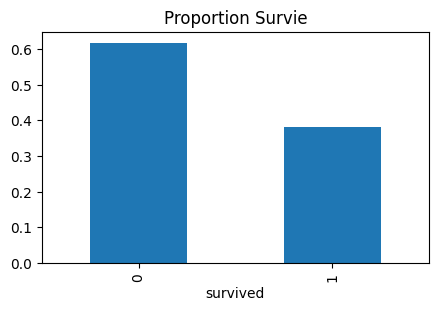

In [ ]:
target_prop=df_train[target].mean()
# visualisation de la proportion de survivants
print(f"proportion {target_prop:.2f} de {df_train[target].max()} dans le dataset")
df_train[target].value_counts(normalize=True).plot.bar(title="Proportion Survie", figsize=(5, 3))

La cible est très légèrement déséquilibrée, donc pas besoin de rééquilibrage synthétique à priori. Cependant, ça veut dire que nous ne pourrons pas utiliser l'accuracy pour évaluer la cible et il faudra soit utiliser un mix de précision et de rappel ou directement un f1-score.

## Variables Qualitatives

### Analyse Univariée - Variables qualitatives

3.10.0


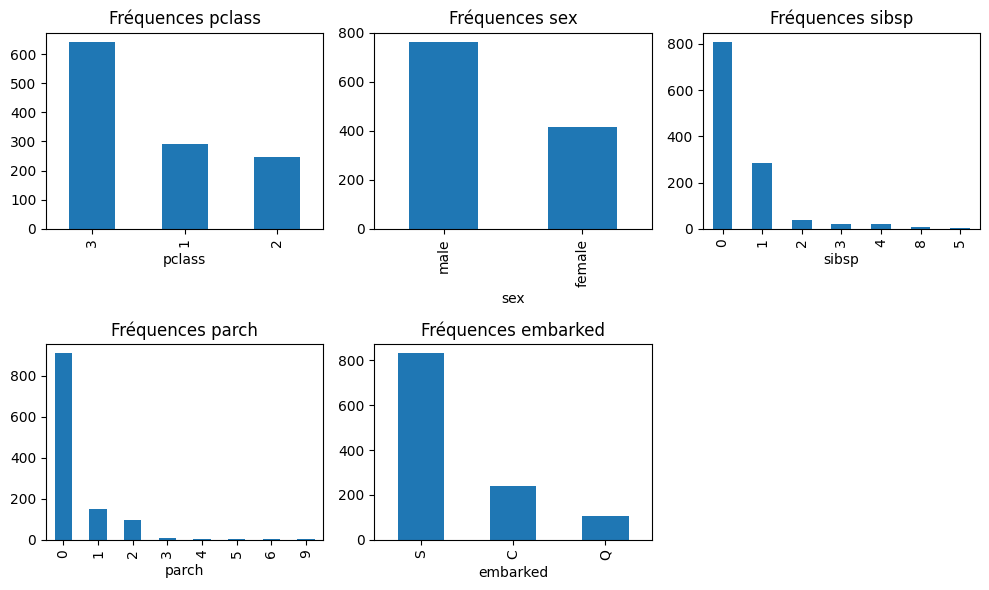

In [ ]:
import matplotlib
print(matplotlib.__version__) # reproducibilité : version des librairies majeures
import matplotlib.pyplot as plt

nrow, ncol = 2, 3
# création d'un graphique unifié
fig, axes = plt.subplots(nrow, ncol, figsize=(10, 6))

# plot counter
count=0
for r in range(nrow):
    for c in range(ncol):
        if count+1<=len(list_quali):
            # remplir ensuite avec des graphiques univariés
            df_train[list_quali[count]].value_counts().plot.bar(ax=axes[r,c], title=f"Fréquences {list_quali[count]}")
            count=count+1
        else:
            axes[r, c].axis("off")

fig.tight_layout()

*   Nous avons une valeur catégorielle binaire sous format textuel :  sex
*   et 4 valeurs catégorielles à modalités multiples : pclass, sibsp, parch, embarked


### Analyse Bivariée - Variables Qualitatives vs Variable Cible

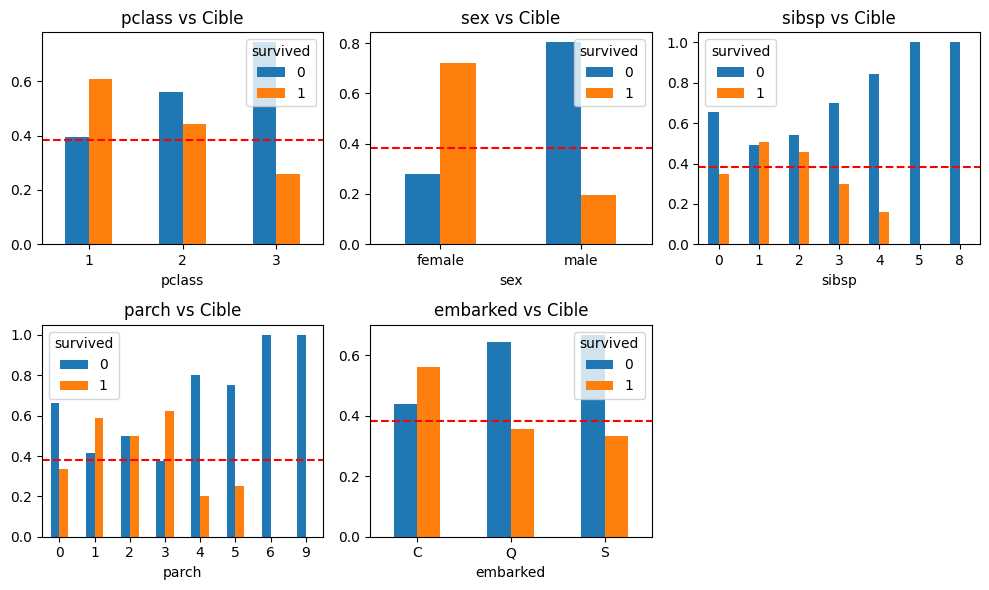

In [ ]:
import matplotlib.pyplot as plt

nrow, ncol = 2, 3
# création d'un subplot unifié
fig, axes = plt.subplots(nrow, ncol, figsize=(10, 6))

# plot counter
count=0
for r in range(nrow):
    for c in range(ncol):
        if count+1<=len(list_quali):
            # remplir ensuite par une analyse bivariée avec la cible
            pd.crosstab(df_train[target], df_train[list_quali[count]], normalize="columns").transpose().plot.bar(ax=axes[r,c],
                                                                                                     title=f"{list_quali[count]} vs Cible",rot=0)
            axes[r,c].axhline(y = target_prop, color = 'r', linestyle = 'dashed')
            count=count+1
        else:
            axes[r, c].axis("off")

fig.tight_layout()

Ces graphiques bivariés nous donnent les conclusions suivantes:
*   Les personnes aux classes supérieures (pclass 1 et 2) ont sensiblement plus de chances de survie que la 3ème classe (séparateur CSP)
*   Les femmes ont sensiblement plus de chances de survie que les hommes (séparateur hommes/femmes)
*   Avoir un ou deux frères/sœurs/époux.se donne plus de chances de survie que l'alternative
    *   Possibilité de transformer ça en variable binaire (0 enfants vs l'alternative, puisque 3 frères/sœurs/époux.se a une fréquence très faible.
*   Avoir de 1 à 3 enfants augmente ses chances de survie par rapport à l'alternative
    *   Possibilité de transformer ça en variable binaire (0 enfants vs l'alternative, puisque 3 enfants et plus a une fréquence très faible)
*   Ceux qui ont embarqué à Cherbourg ont plus de chances de survie que ceux qui ont embarqué aux autres ports.



### Pré-traitement des Variables Qualitatives

*   On convertit nos variables binaires en 0 et 1, avec 1, valant la modalité qui a le plus de chance de survivre. Ca inclut sibsp, parch, et sex
*   On convertit nos variables multicatégorielles avec la même approche. Ca inclut pclass et embarked. Ca permet également de gérer les valeurs manquantes de embarked

In [ ]:
def preprocess_quali(df):
    """
    Transforme les variables qualitatives du jeu de données Titanic en indicateurs binaires.

    Cette fonction ajoute au DataFrame d'entrée des colonnes binaires (0/1) pour :
      - "sex" : indicateur pour les passagères ("feat_female")
      - "parch" : indicateur pour avoir au moins un parent/enfant à bord ("feat_parch")
      - "sibsp" : indicateur pour avoir au moins un frère/soeur ou conjoint à bord ("feat_sibsp")
      - "pclass" : indicateurs pour la 1ère et la 2ème classe ("feat_pclass_1", "feat_pclass_2")
      - "embarked" : indicateurs pour les ports de Southampton et Cherbourg ("feat_embarked_S", "feat_embarked_C")

    Les nouveaux noms de colonnes sont regroupés dans une liste et renvoyés avec le DataFrame modifié.

    Paramètres
    ----------
    df : pandas.DataFrame
        DataFrame contenant au minimum les colonnes suivantes :
        - "sex" (valeurs "male" ou "female")
        - "parch" (nombre de parents/enfants à bord)
        - "sibsp" (nombre de frères/soeurs/conjoints à bord)
        - "pclass" (1, 2 ou 3 pour la classe du passager)
        - "embarked" (port d'embarquement, ex. "S", "C" ou "Q")

    Retourne
    -------
    df : pandas.DataFrame
        Le même DataFrame, modifié en place avec les nouvelles colonnes binaires.
    feats_quali : list of str
        Liste des noms des colonnes binaires créées, dans l'ordre d'ajout.
    """
    feats_quali=[]
    # on s'occupe d'abord des variables binaires
    # préférence : valeur = 1 <=> corrélation positive avec cible
    df["feat_female"]=(df["sex"]=="female").astype(int)
    feats_quali.append("feat_female")
    df["feat_parch"]=(df["parch"]>0).astype(int)
    feats_quali.append("feat_parch")
    df["feat_sibsp"]=(df["sibsp"]>0).astype(int)
    feats_quali.append("feat_sibsp")
    # on traite ensuite les valeur multicatégorielle (pclass, embarked)
    for i in [1, 2]:
        df[f"feat_pclass_{i}"]=(df["pclass"]==i).astype(int)
        feats_quali.append(f"feat_pclass_{i}")
    for i in ["S", "C"]:
        df[f"feat_embarked_{i}"]=(df["embarked"]==i).astype(int)
        feats_quali.append(f"feat_embarked_{i}")
    return df, feats_quali

On applique ensuite la pipeline sur le jeu de train et le jeu de test

In [ ]:
list_feat=[]
# on teste le pan quali de la pipeline pour transformer le train et récupérer les colonnes
df_train, feats_quali=preprocess_quali(df_train)
# on applique sur le jeu d'évaluation
df_eval, _=preprocess_quali(df_eval)
list_feat.extend(feats_quali)

## Variables Quantitatives

### Analyse Univariée - Valeurs Quantitatives

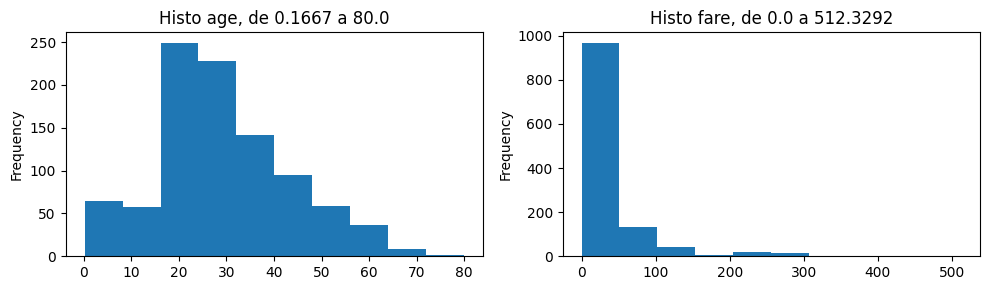

In [ ]:
import matplotlib.pyplot as plt

nrow, ncol = 1, 2
# création d'un subplot commun
fig, axes = plt.subplots(nrow, ncol, figsize=(10, 3))

# plot counter
count=0
for c in range(ncol):
    # rajout des graphiques univariés un par un
    df_train[list_quanti[count]].plot.hist(ax=axes[c], title=f"Histo {list_quanti[count]}, de {df_train[list_quanti[count]].min()} a {df_train[list_quanti[count]].max()}")
    count=count+1

fig.tight_layout()

*   D'office, on remarque la différence d'échelle entre les 2 variables. Il faudra donc normaliser
*   A priori, il n'y a pas de valeurs aberrantes dans les âges
*   Il y a des valeurs extrêmes dans fare à priori, même si elle n'est pas problématique
    *   A priori pas de problème avec les valeurs extrêmes d'un point de vue modélisation, tant qu'on utilise des modèles non-paramétriques, sans hypothèse sur les variables d'entrée (style arbres, ensembles). Cependant ce serait pour nous un facteur limitant
    *   Cependant, d'un point de vue visualisation, c'est embêtant: Nous n'avons aucune idée de la distribution et du comportement des variables

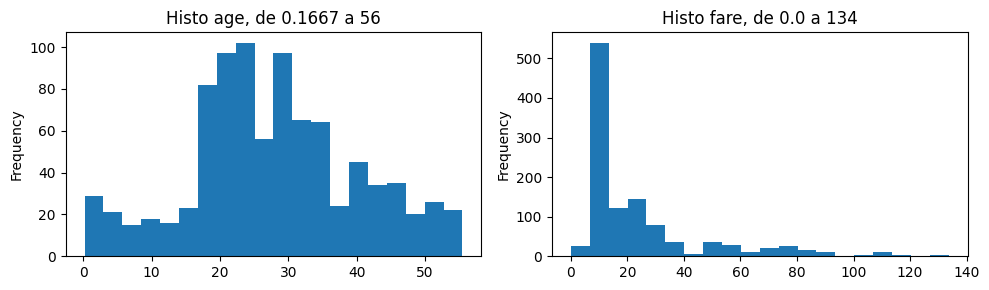

In [ ]:
import matplotlib.pyplot as plt

nrow, ncol = 1, 2
# création d'un graphique unifié
fig, axes = plt.subplots(nrow, ncol, figsize=(10, 3))

# plot counter
count=0
for c in range(ncol):
    # on récupère le quantile à 95%
    q95=df_train[list_quanti[count]].quantile(0.95)
    # on ne plot que jusqu'au quantile pour faciliter la visualisation
    df_train.loc[df_train[list_quanti[count]]<q95, list_quanti[count]].plot.hist(ax=axes[c],bins=20,
                                                                                title=f"Histo {list_quanti[count]}, de {df_train[list_quanti[count]].min()} a {int(round(q95,0))}")
    count=count+1

fig.tight_layout()

En augmentant le nombre de bins et en supprimant (juste pour la visualisation) les lignes > quantile 95%, on obtient des graphiques plus interprétables.
*   Les âges suivent une distribution à deux bosses
*   Les prix des tickets (fare) suit une distribution à queue épaisse à priori
    *   Le pic entre 7 et 12 devrait correspondre au prix du billet de base

### Analyse Bivariée - Variables Quantitatives vs Variable Cible

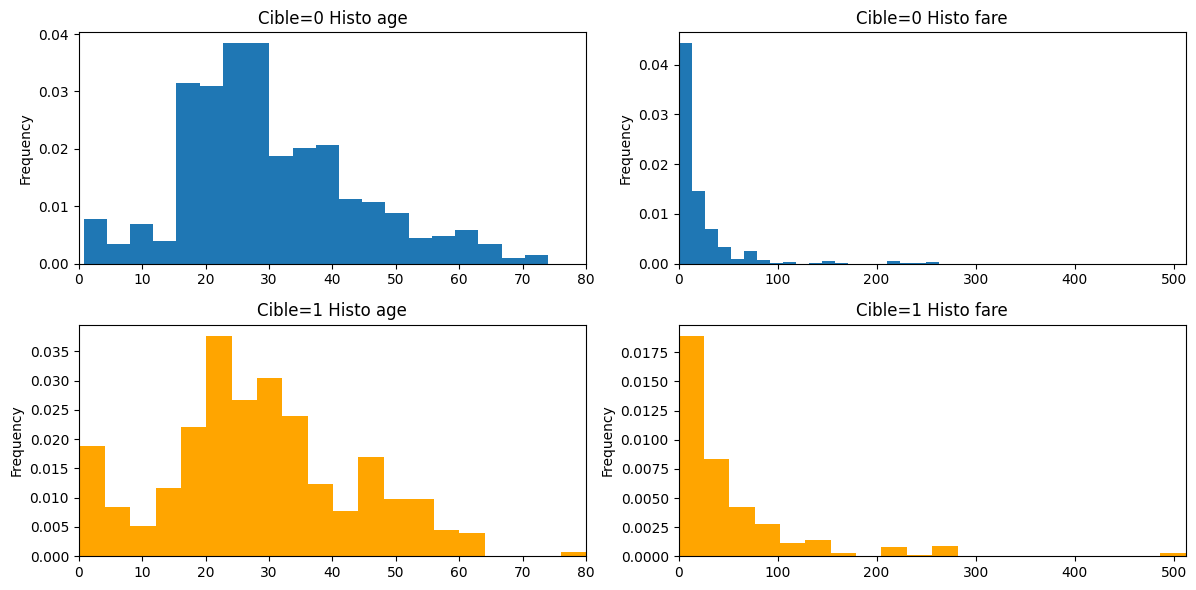

In [ ]:
import matplotlib.pyplot as plt

nrow, ncol = 2, 2
# création d'un subplot unifié
fig, axes = plt.subplots(nrow, ncol, figsize=(12, 6))
list_quanti_feat=["age", "fare"]
# plot counter
count=0
for c in range(ncol):
    # séparation entre l'histogramme des non survivants
    df_train.loc[df_train[target]==0, list_quanti_feat[count]].plot.hist(ax=axes[0,c],bins=20,density = True,
                                title=f"Cible=0 Histo {list_quanti_feat[count]}", xlim=(0,df_train[list_quanti_feat[count]].max()))
    # et l'histogramme des survivants
    df_train.loc[df_train[target]==1, list_quanti_feat[count]].plot.hist(ax=axes[1,c],bins=20,density = True,color = "orange",
                                title=f"Cible=1 Histo {list_quanti_feat[count]}", xlim=(0,df_train[list_quanti_feat[count]].max()))
    count=count+1

fig.tight_layout()

On remarque que la variable âge a le potentiel d'être très influente, puisque la distribution change et devient décalée vers la gauche, semblant indiquer que les enfants ont eu plus de chances de survie.
Le prix du ticket est également influent, avec la distribution qui se décale vers la droite.

### Pré-traitement des Variables Quantitatives

A noter, que le traitement devra prendre en compte les valeurs manquantes pour l'âge. Nous proposons deux façons de le faire:

- Remplacement par la médiane: Plus robuste que la moyenne, nous l'utiliserons pour la variable fare par défaut, et pour la variable âge dans l'un des deux scénarios
- Remplacement par régression linéaire: Tire partie des multicolinéarités qui existent entre toutes les variables et la variable âge, et permet de la prédire avec plus de précision. Nous l'utiliserons pour la variable âge dans le deuxième scénario.

In [ ]:
def preprocess_quanti(df, norm_dict=None, linear_model=None, list_feat=None):
    """
    Prétraitement des variables quantitatives avec option d"imputation de l"âge par Lasso sur données normalisées.

    Paramètres
    ----------
    df : pd.DataFrame
        Jeu de données contenant au moins "age" et "fare".
    norm_dict : dict ou None
        Dictionnaire de min/max pour la normalisation. Si None ou vide, il est calculé.
    linear_model : None, bool, ou estimateur sklearn
        - None : imputation par médiane.
        - True : on ajuste un modèle Lasso puis on prédit les âges manquants.
        - estimateur : on utilise cet estimateur pour prédire les âges manquants.
    list_feat : list de str
        Liste des noms de variables finales (inclut "feat_fare" et "feat_age").

    Retourne
    -------
    df : pd.DataFrame
        DataFrame enrichi de "feat_fare" et "feat_age".
    norm_dict : dict
        Dictionnaire de normalisation mis à jour.
    feats_quanti : list
        Liste des colonnes quantitatives créées.
    lm_model : Lasso ou None
        Modèle Lasso entraîné si linear_model=True, sinon None.
    """
    feats_quanti = []
    lm_model = None

    # imputation par la médiane
    df['feat_fare'] = df['fare'].fillna(df['fare'].median())
    feats_quanti.append('feat_fare')

    # on impute temporairement avec la médiane pour normalisation
    df['_age_fill'] = df['age'].fillna(df['age'].median())
    feats_quanti.append('_age_fill')

    # on normalise: si on n'a pas de dictionnaire pour normaliser, on en crée un et on l'utilise
    if not norm_dict:
        norm_dict = {col: {'min': df[col].min(), 'max': df[col].max()} for col in feats_quanti}
    for col in feats_quanti:
        mn, mx = norm_dict[col]['min'], norm_dict[col]['max']
        df[col] = (df[col] - mn) / (mx - mn)
        df[col] = df[col].clip(0, 1) # on restreint à des valeurs entre 0 et 1

    # 5) Finalisation de feat_age
    df['feat_age'] = df['_age_fill']
    feats_quanti = ['feat_fare', 'feat_age']
    df.drop(columns=['_age_fill'], inplace=True)


    # imputation de l'âge par imputation prédictive
    if linear_model is not None:
        # si on va utiliser l'imputation prédictive, on choisit les variables à utiliser
        predictors = [f for f in list_feat if f != 'age']
        if 'feat_fare' not in predictors:
            predictors.append('feat_fare')
        if linear_model is True:
            train_idx = df['age'].notna()
            X_train = df.loc[train_idx, predictors] # le train = là où âge existe
            y_train = df.loc[train_idx, 'feat_age'] # le test = là où âge est manquant
            lm_model = Lasso(alpha=1.0, random_state=42) # régression lasso sur le train
            lm_model.fit(X_train, y_train)
            missing_idx = df['age'].isna() # on remplit les âges manquants
            df.loc[missing_idx, 'feat_age'] = lm_model.predict(df.loc[missing_idx, predictors])
        elif hasattr(linear_model, 'predict'):
            missing_idx = df['age'].isna() # on remplit les âges manquants sans entraînement
            df.loc[missing_idx, 'feat_age'] = linear_model.predict(df.loc[missing_idx, predictors])
    # si linear_model est None, on conserve l'âge imputé par médiane

    # pour garder la valeur dans le périmètre dans le cas du jeu de test et d'eval
    df['feat_age'] = df['feat_age'].clip(0, 1)

    return df, norm_dict, feats_quanti, lm_model

In [ ]:
# application sur le jeu quanti, récupération du dictionnaire de normalisation
# et la liste de variables quantitatives transformées
df_train, norm_dict, feats_quanti, _=preprocess_quanti(df_train)
df_eval, _, _, _=preprocess_quanti(df_eval, norm_dict)
list_feat.extend(feats_quanti)

## Variables Qualitatives à Forte Cardinalité

Il convient de traiter ces variables à part car d'un côté leur pouvoir prédictif est probablement plus faible si traitées modalité par modalité (car l'information est éparpillée sur plein de modalités) et de l'autre, les modèles (en particulier ceux basés sur les arbres) auront tendance à surévaluer leur pouvoir prédictif et les utiliser plus souvent.

*   Pour cabin, on va la transformer en variable binaire, considérant uniquement la présence ou l'absence de cabine
*   Pour name, on va extraire les titres avec des expressions régulières, puis regrouper les titres selon leur pouvoir prédictif



In [ ]:
# transformation de la cabine en variable explicative (présence ou absence)
df_train["feat_cabin"]=df_train["cabin"].notna().astype(int)
# extraction des titres avec expressions régulières
list_titles=['Mr','Mrs','Miss', 'Ms', 'Master', 'Major', 'Mme',
              'Mlle', 'Sir', 'Lady', 'Dr', 'Rev', 'Col', 'Capt', 'Don', 'Dona',
             'Countess', 'Jonkheer']
regex_titles="|".join([f"{i}\." for i in list_titles])

df_train["title"]=df_train["name"].str.extract(f"({regex_titles})")

### Analyse Univariée - Valeurs Qualitatives à Forte Cardinalité

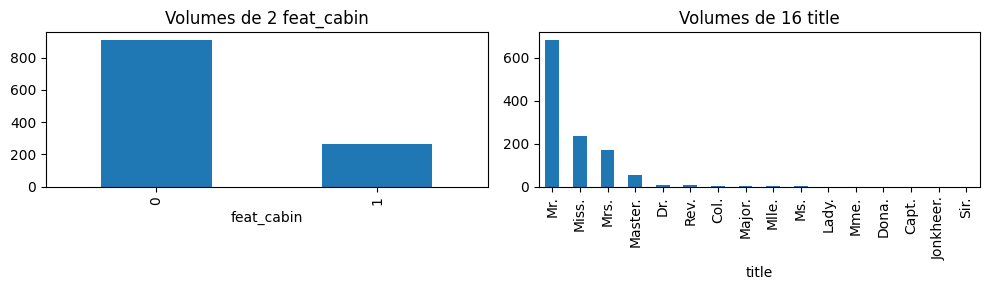

In [ ]:
import matplotlib.pyplot as plt

nrow, ncol = 1, 2
fig, axes = plt.subplots(nrow, ncol, figsize=(10, 3))
# création d'un subplot unifié
list_other_updated=["feat_cabin", "title"]

count=0
for c in range(ncol):
    # visualisation des fréquences des variables qualitatives
    df_train[list_other_updated[count]].value_counts().plot.bar(ax=axes[c], title=f"Volumes de {df_train[list_other_updated[count]].nunique()} {list_other_updated[count]}")
    count=count+1

fig.tight_layout()

Ce premier graphe nous donne deux informations importantes:

*   Il y a 3 titres avec une majorité relative, et plein de petits titres minoritaires

Pour faire des décisions informées concernant leur regroupement, il convient de regarder l'effet des modalités sur la variable cible.

### Variables Qualitatives à Forte Cardinalité vs Variable Cible

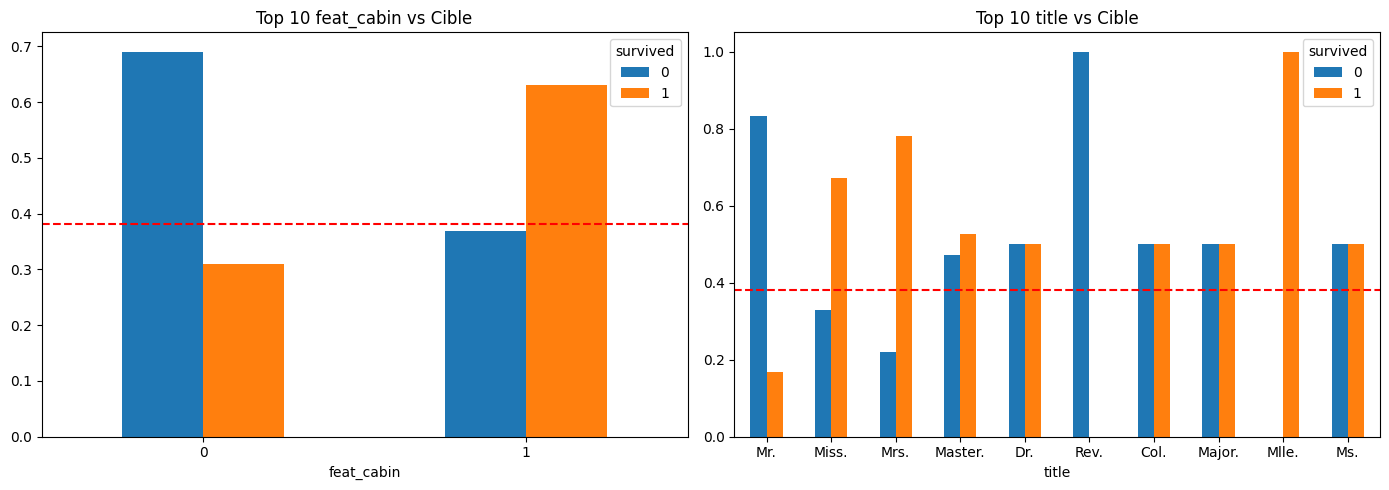

In [ ]:
import matplotlib.pyplot as plt

nrow, ncol = 1, 2
# création d'un plot unifié
fig, axes = plt.subplots(nrow, ncol, figsize=(14, 5))
list_other_updated=["feat_cabin", "title"]

count=0
for c in range(ncol):
    # récupération du top 10 titres (pour faciliter la visualisation)
    top10_index=df_train[list_other_updated[count]].value_counts()[0:10].index
    df_top10=df_train[df_train[list_other_updated[count]].isin(top10_index)]
    # visualisation bivariée des titres/cabines vs cible
    pd.crosstab(df_top10[target], df_top10[list_other_updated[count]], normalize="columns")[top10_index].transpose().plot.bar(ax=axes[c],
                                                                                                title=f"Top 10 {list_other_updated[count]} vs Cible",rot=0)
    axes[c].axhline(y = target_prop, color = 'r', linestyle = 'dashed')
    count=count+1

fig.tight_layout()

D'abord, avoir une cabine contribue positivement aux chances de survie selon ce graphe. Ensuite, ce graphe nous indique l'impact de chaque titre sur la variable cible. On peut déjà voir que certains titres ont un impact plutôt supérieur à la moyenne (Miss, Mrs, Master et Dr), et d'autres avec un impact plutôt inférieur à la moyenne (Mr, Rev par exemple).

### Pré-traitement des Variables Qualitatives à Forte Cardinalité

Avec ces informations, nous allons opérer la transformation suivante :
*   Les titres connus seront encodés selon leur effect supérieur à la moyenne ou inférieur à la moyenne sur la variable cible, et regroupés dans ces deux catégories
*   Les titres "inconnus" (titre absents du train set) ne seront pas encodés, mais le code de preprocessing devra les intégrer pour ne pas générer d'erreur lors du preprocessing des jeux de test et d'évaluation.

Enfin, il va sans dire que, pour éviter le data leakage, nous allons identifier ces classes dites "majoritaires" et "minoritaires" sur le train, mais les appliquer sur le test

In [ ]:
def process_other(df, dict_cat={}):
    """
    Transforme les variables qualitatives à forte cardinalité en deux classes selon leur effet sur la cible :
    - "pos" pour celles au-dessus de la proportion moyenne de la cible
    - "neg" pour celles en-dessous

    Retourne:
        df (pd.DataFrame): DataFrame enrichie des nouvelles features.
        dict_cat (dict): mapping des classes positives et négatives pour chaque variable.
        feats_other (list): liste des noms de colonnes créées.
    """
    feats_other = []

    # Ex : feature binaire pour cabin
    df["feat_cabin"] = df["cabin"].notna().astype(int)
    feats_other.append("feat_cabin")

    # Extraction du titre depuis le nom
    list_titles = ['Mr','Mrs','Miss','Ms','Master','Major','Mme',
                   'Mlle','Sir','Lady','Dr','Rev','Col','Capt','Don','Dona',
                   'Countess','Jonkheer']
    regex_titles = "|".join([f"{t}\." for t in list_titles])
    df["title"] = df["name"].str.extract(f"({regex_titles})")

    # Calcul de la proportion moyenne de la cible si nécessaire
    if not dict_cat:
        target_prop = df[target].mean()

    # Traitement des variables listées
    for col in ['title']:
        if not dict_cat:
            dict_cat[col] = {}
            # Cross-tabulation pour chaque modalité
            df_crosstab = pd.crosstab(df[target], df[col], normalize='columns').transpose().reset_index()
            # Classes positives et négatives selon effet sur cible
            dict_cat[col]['list_min_pos'] = df_crosstab.loc[df_crosstab[1] >= target_prop, col].tolist()
            dict_cat[col]['list_min_neg'] = df_crosstab.loc[df_crosstab[1] < target_prop, col].tolist()

        # Assignation "pos" ou "neg"
        df[f"feat_{col}"] = np.where(df[col].isin(dict_cat[col]['list_min_pos']), 'pos', 'neg')
        # pour éviter d'avoir deux colonnes ultra corrélées, on en supprime une
        df[f"feat_{col}_pos"] = (df[f"feat_{col}"] == 'pos').astype(int)
        feats_other.append(f"feat_{col}_pos")

    return df, dict_cat, feats_other

In [ ]:
df_train, dict_cat, feats_other = process_other(df_train)
df_eval, _, _ = process_other(df_eval, dict_cat)
list_feat.extend(feats_other)

### Visualisation des Nouvelles Variables vs Variable Cible

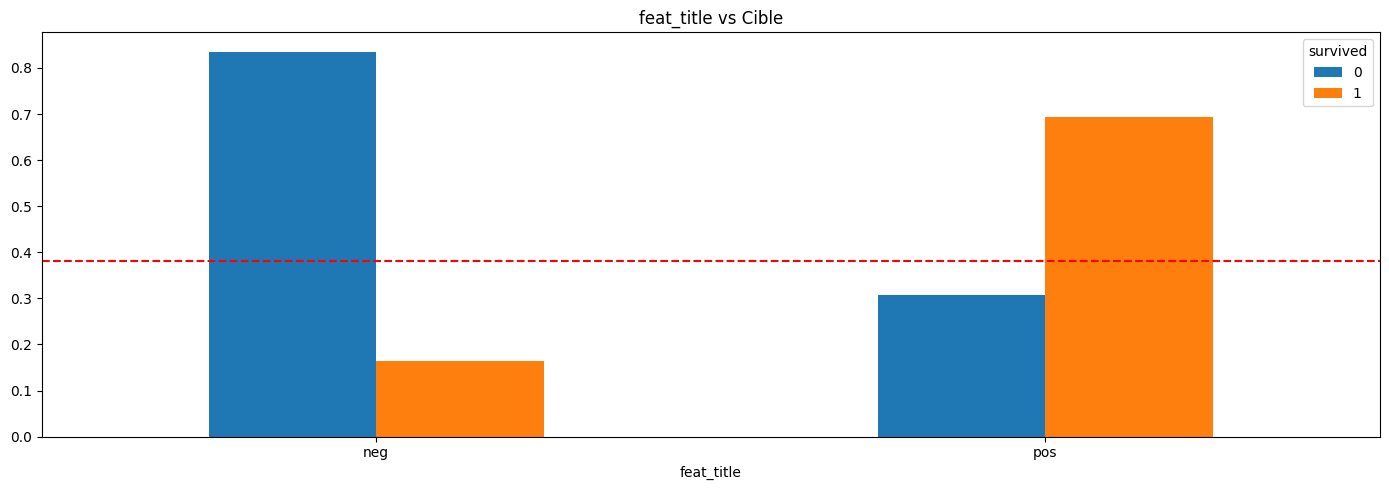

In [ ]:
nrow, ncol = 1, 1
# création d'un plot unifié
fig, axes = plt.subplots(nrow, ncol, figsize=(14, 5))
feats_other_vis=["feat_title"]

count=0
for c in range(ncol):
    # visualisation des nouvelles variables selon leur impact sur la cible
    pd.crosstab(df_train[target], df_train[feats_other_vis[count]], normalize="columns").transpose().plot.bar(ax=axes,
                                                                                                title=f"{feats_other_vis[count]} vs Cible",rot=0)
    axes.axhline(y = target_prop, color = 'r', linestyle = 'dashed')
    count=count+1

fig.tight_layout()

Après regroupement des valeurs selon leur impact potentiel sur la variable cible, on peut arriver à ce graphique qui démontre bien la valeur de nos regroupement, qui sont bien homogènes par rapport à leur impact sur la cible.

## Combinaison des méthodes de pré-traitement

Nous allons donc combiner nos différentes méthodes de preprocessing en une seule pipeline, compatible avec le reste de l'écosystème scikit-learn. Ceci nous permettra d'utiliser des fonctions optimisées pour la validation croisée, le gridsearch et l'évaluation.

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline

class Preprocessor(BaseEstimator, TransformerMixin):
    """
    Préprocesseur pour pipelines scikit-learn
    Transforme les données brutes en données exploitables pour le modèle
      - variables qualitatives : encodage en binaires
      - variables quantitatives : normalisation, imputation de valeurs manquantes
      - variables qualitatives à fortes cardinalités : séparation selon impact sur la cible

    Usage :
        >>> preproc = Preprocessor(list_feat=[...], target="survived", use_lasso=True)
        >>> X_train_trans = preproc.fit_transform(X_train) # prétraitement + fit
        >>> X_test_trans = preproc.transform(X_test) # prétraitement uniquement

    Paramètres
    ----------
    list_feat : list de str
        Noms des variables à conserver et renvoyer après transformation.
    target : str, default="survived"
        Nom de la colonne cible à exclure lors de l"imputation d"âge par régression.
    use_lasso : bool, default=False
        Si True, utilise Lasso pour imputer les valeurs manquantes d"âge, sinon imputation simple.

    Attributs après fit
    -------------------
    norm_dict : dict
        Dictionnaire des paramètres de normalisation calculés sur les variables quantitatives.
    dict_cat : dict
        Dictionnaire des modalités des variables qualitatives pour le codage.
    lasso_model_ : sklearn.linear_model.Lasso
        Modèle Lasso entraîné pour l"imputation d"âge si use_lasso=True.
    """
    def __init__(self, list_feat, target='survived', use_lasso=False):
        """
        Initialisation du préprocesseur.

        Paramètres
        ----------
        list_feat : list de str
            Variables finales à renvoyer après transformation.
        target : str
            Nom de la colonne cible pour exclusion lors de l'imputation d'âge.
        use_lasso : bool
            Si True, on utilise Lasso pour imputer l'âge manquant.
        """
        self.list_feat = list_feat
        self.target = target
        self.use_lasso = use_lasso
        self.norm_dict = None
        self.dict_cat = None
        self.lasso_model_ = None

    def fit(self, X, y=None):
        return self.fit_transform(X)

    def fit_transform(self, X, y=None):
        X = X.copy()
        X, _ = preprocess_quali(X)
        X, self.dict_cat, _ = process_other(X)
        X, self.norm_dict, _, lm = preprocess_quanti(
            X,
            norm_dict={},
            linear_model=True if self.use_lasso else None,
            list_feat=self.list_feat
        )
        self.lasso_model_ = lm
        return X[self.list_feat]

    def transform(self, X):
        X = X.copy()
        # on s'assure qu'on a fait fit avant
        if self.dict_cat is None or self.norm_dict is None:
            raise ValueError("Appeler fit avant transform.")
        X, _ = preprocess_quali(X)
        X, _, _ = process_other(X, self.dict_cat)
        X, _, _, _ = preprocess_quanti(
            X,
            norm_dict=self.norm_dict,
            linear_model=self.lasso_model_,
            list_feat=self.list_feat)
        return X[self.list_feat]

Avec cette classe de preprocessing, on peut initialiser une pipeline "baseline", qui reçoit les données, les prépare et fait la prédiction.

In [ ]:
# teste la pipeline complète sur le jeu de train
df_train_processed = Preprocessor(list_feat=list_feat, target='survived', use_lasso=False).fit_transform(df_train)

# Analyse multivariée des variables finales - corrélation

Après traitement des variables, toutes les variables restantes correspondent soit à des indicatrices (0 ou 1) soit à des variables quantitatives transformées pour être entre 0 et 1.

Ceci nous permet de faire une analyse multivariée en utilisant les corrélations de Spearman. Celle-ci mesure le degré d'association monotone entre deux variables en utilisant leurs rangs plutôt que leurs valeurs brutes. Elle ne suppose ni linéarité, ni normalité des données, et est robuste aux valeurs extrêmes - contrairement à la corrélation de Pearson. Ceci la rend particulièrement adaptée à nos objectifs.


0.13.2


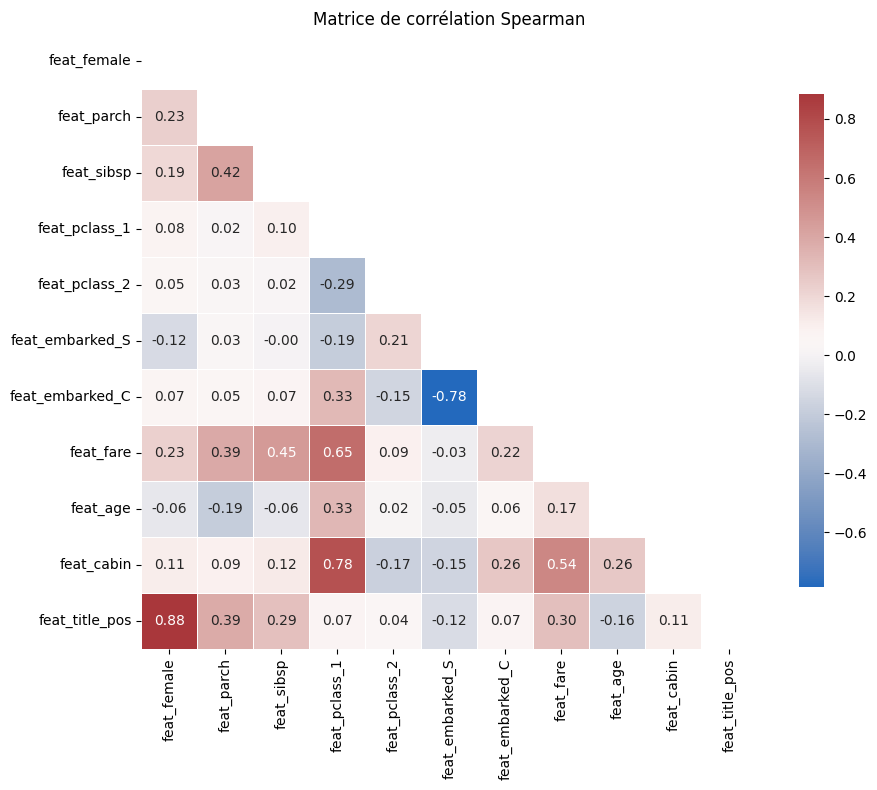

In [ ]:
import seaborn as sns
print(sns.__version__) # reproducibilité : version des librairies majeures


def plot_spearman_corr(df, figsize=(10,8), cmap="vlag", annot=True):
    """
    Calcule la matrice de corrélation Spearman et l'affiche avec un heatmap.

    Paramètres
    ----------
    df : pd.DataFrame
        DataFrame contenant à la fois des variables numériques et/ou
        des variables qualitatives déjà encodées (int, float).
    figsize : tuple
        Taille de la figure matplotlib.
    cmap : str
        Palette de couleurs pour le heatmap (ex. 'vlag', 'coolwarm', etc.).
    annot : bool
        Si True, affiche les coefficients dans les cases.

    Retour
    ------
    corr : pd.DataFrame
        La matrice de corrélation Spearman.
    """
    # Spearman car vérifie les rangs
    corr = df.corr(method='spearman')

    # Masque la partie supérieure (facultatif, pour ne pas dupliquer)
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # Plot
    plt.figure(figsize=figsize)
    sns.heatmap(
        corr,
        mask=mask,
        cmap=cmap,
        annot=annot,
        fmt=".2f",
        square=True,
        linewidths=.5,
        cbar_kws={"shrink": .8}
    )
    plt.title("Matrice de corrélation Spearman")
    plt.tight_layout()
    plt.show()

plot_spearman_corr(df_train_processed)

*   **feat\_title\_pos** correspond aux titres ayant un effet positif sur la survie, principalement des titres féminins, ce qui génère la corrélation avec **feat\_female**
*   **feat\_cabin** est fortement corrélé avec  **feat\_pclass\_1**, donc les passagers à cabine avec les passagers première classe
*   Ceux qui ont embarqué au port S n'ont pas embarqué au port C (ce qui est évident)
*   Il y a des corrélations intéressantes entre **feat\_fare** et **feat\_sibsp**, indiquant peut-être des tickets groupés (un prix élevé mais pour toute la famille)
*   Puisqu'on utilisera de la régularisation, la multicolinéarité ne nous inquiète pas particulièrement. Nous nous attendons à ce que le modèle mette à zéro les variables qui ne lui ramènent pas de l'information supplémentaire.

# Modélisation

Dans ce qui suit, il faut noter qu'à cause de l'aléa inhérent à l'apprentissage statistique - notamment en séparation de jeux de données dans la validation croisée - il se peut que les résultats affichés diffèrent légèrement des interprétations écrites. Sur le rapport, vous pourrez trouver les graphiques et résultats qui correspondent à ces interprétations et ceux-ci peuvent être différents (légèrement) par rapport à ce que vous obtiendrez si vous réexécutez le code sur votre machine.

Nous avons fait de notre mieux pour "maîtriser" l'aléa en fixant le "seed" au début du code dans toutes les librairies utilisées - normalement elles devraient soit utiliser numpy ou random pour générer des nombres aléatoires, et nous avons fixé le seed dans les deux. Cependant, pour une reproducibilité parfaite, il faut avoir le même seed, les mêmes versions de librairies, même version de Python et même système d'exploitation sur la machine - ce qui n'est pas toujours garanti. Nous préférons donc vous prévenir de ce risque minime au cas où il y a une différence des résultats (elle devrait être de l'ordre de 1% de performance à priori)


## Modèle plancher

On doit d'abord construire un modèle dit "plancher", c'est à dire un modèle avec les paramètres par défaut. Nous utilisons ce modèle pour avoir une performance "plancher" pour notre modèle, à laquelle les techniques suivantes vont se mesurer.

Pour cela, il faut d'abord mettre en place une stratégie de validation croisée stratifiée. C'est important dans la mesure où notre y est déséquilibré. Pour pouvoir utiliser les fonctions pré-existantes de sklearn, il faut prendre en compte que notre preprocessing (surtout la partie normalisation) utilise des données sur tout le dataset. Pour éviter le data leakage, nous devons construire une pipeline de preprocessing personnalisé puis entraîner un modèle dessus.

In [ ]:
from sklearn.linear_model import LogisticRegression
# pipeline avec preprocessing, sans imputation automatique avec lasso, régression logistique
training_pipeline_baseline = Pipeline(steps=[
        ('preprocessing', Preprocessor(list_feat=list_feat, use_lasso=False)),
        ('model', LogisticRegression()),
    ])

## Validation croisée du modèle baseline

Nous allons faire une validation croisée sur 10 découpages aléatoires stratifiés. Ils sont stratifiés car nos données sont déséquilibrées

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold

scoring = {"AUC": "roc_auc", "f1_score": "f1", "precision":"precision", "recall_score":"recall" }

results=pd.DataFrame(cross_validate(training_pipeline_baseline, df_train, df_train[target],
                                    cv=StratifiedKFold(10), scoring=list(scoring.values()))).mean().transpose()
results

,0
fit_time,0.043316
score_time,0.076025
test_roc_auc,0.844395
test_f1,0.719022
test_precision,0.730306
test_recall,0.711111


## Courbe ROC et matrice de confusion

Nous allons définir notre propre fonction d'évaluation, qui permettra de visualiser la matrice de confusion et la courbe roc, ainsi que de générer des métriques pour un modèle donné

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, roc_curve, auc
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score, accuracy_score

def evaluate_model(model, df, list_feat, target, label=None, plot=True, print_report=True):
    """
    Évalue un modèle de classification binaire en calculant plusieurs métriques,
    en affichant un rapport de classification, la matrice de confusion et la courbe ROC-AUC.

    Args:
        model:
            Un estimateur scikit-learn entraîné possédant les méthodes "predict" et,
            si disponible, "predict_proba".
        df (pandas.DataFrame):
            Jeu de données contenant les features et la colonne cible.
        list_feat (list of str):
            Liste des noms de colonnes à utiliser comme variables explicatives.
        target (str):
            Nom de la colonne cible (variable à prédire).
        label (str, optional):
            Étiquette descriptive pour l'affichage des graphiques. Si None,
            on utilise "baseline_<NomDuModèle>". Par défaut None.
        plot (bool, optional):
            Si True, affiche la matrice de confusion et la courbe ROC-AUC.
            Par défaut True.
        print_report (bool, optional):
            Si True, imprime le rapport de classification ("precision", "recall", "f1-score").
            Par défaut True.

    Returns:
        dict:
            Dictionnaire contenant les valeurs suivantes :
            - "label" (str) : étiquette utilisée pour les sorties graphiques.
            - "accuracy" (float) : taux de bonnes prédictions.
            - "f1_score" (float) : score F1.
            - "auc" (float) : aire sous la courbe ROC.
            - "precision" (float) : précision (positive predictive value).
            - "recall" (float) : rappel (sensitivity).
    """
    if not label:
        label=f"baseline_{model.__class__.__name__}"
    # Predictions
    y_pred = model.predict(df)
    try: # certains modèles (comme SVM) ne peuvent pas fournir de probas
        y_proba = model.predict_proba(df)[:, 1]
    except:
        y_proba = y_pred
    y_true = df[target]
    # Classification Report
    if print_report:
        print(classification_report(y_true, y_pred))

    if plot:
        # Confusion Matrix
        fig, axes = plt.subplots(figsize = (8,3), ncols = 2)
        cm = confusion_matrix(y_true, y_pred, labels=model.classes_)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                display_labels=model.classes_)
        disp.plot(ax=axes[0])

        # Confusion Matrix
        axes[0].set_title(f"Confusion Matrix {label}", fontsize=10)

        # ROC-AUC Curve
        fpr, tpr, thresholds = roc_curve(y_true, y_proba)
        roc_auc = auc(fpr, tpr)
        display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                        estimator_name=label)
        display.plot(ax=axes[1])

        axes[1].legend()
        axes[1].plot([0,1], [0,1], ls = ':')
        axes[1].grid()
        axes[1].set_title(f"ROC-AUC Plot {label}", fontsize=10)
        fig.tight_layout()
        plt.show()
    return {
        "label":label,
        "accuracy":accuracy_score(y_true, y_pred),
        "f1_score":f1_score(y_true, y_pred),
        "auc":roc_auc_score(y_true, y_proba),
        "precision":precision_score(y_true, y_pred),
        "recall":recall_score(y_true, y_pred),
    }

              precision    recall  f1-score   support

           0       0.85      0.88      0.86        81
           1       0.79      0.74      0.76        50

    accuracy                           0.82       131
   macro avg       0.82      0.81      0.81       131
weighted avg       0.82      0.82      0.82       131



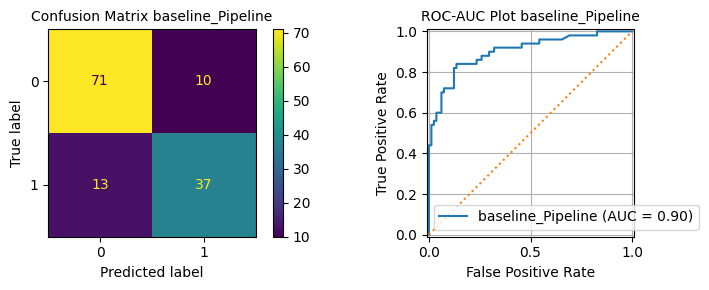

In [ ]:
from time import time

results_list=[]
# évaluation du modèle baseline sur le jeu d'évaluation
default_params={"penalty":None, "class_weight":None, "solver":"liblinear"}
a=time()
model = training_pipeline_baseline.fit(df_train, df_train[target])
# on rajoute les résultats de l'évaluation à notre tableau
results_list.append( dict(evaluate_model(model, df_eval, list_feat, target), **{"model":model,'time':time()-a,'params':default_params})  )

L'entraînement du modèle plancher nous permet d'avoir ce résultat initial, contre lequel les autres approches vont être comparées par la suite.

## Modèle plancher avec imputation lasso des âges manquants

L'approche suivante consiste à voir l'impact de l'imputation Lasso des âges manquants par rapport à l'imputation par la médiane. La pipeline de pré-traitement est donc légèrement modifiée pour imputer les âges manquants sur le train et le test en entraînant un modèle de régression Lasso sur les variables explicatives du jeu de train et en l'appliquant sur le jeu de test.

In [ ]:
from sklearn.linear_model import LogisticRegression
# pipeline de base, mais avec imputation lasso
training_pipeline_lasso_age = Pipeline(steps=[
        ('preprocessing', Preprocessor(list_feat=list_feat, use_lasso=True)),
        ('model', LogisticRegression()),
    ])

              precision    recall  f1-score   support

           0       0.86      0.88      0.87        81
           1       0.79      0.76      0.78        50

    accuracy                           0.83       131
   macro avg       0.82      0.82      0.82       131
weighted avg       0.83      0.83      0.83       131



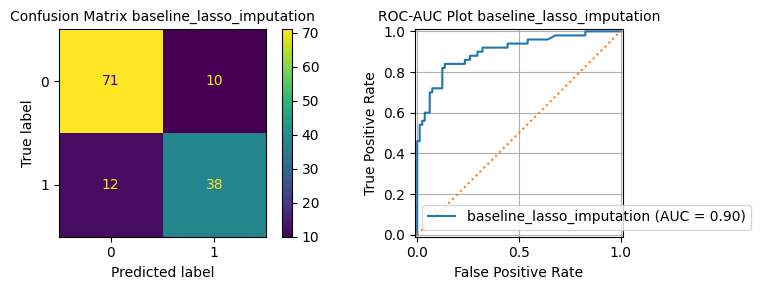

In [ ]:
from time import time

# évaluation du modèle baseline sur le jeu d'évaluation
default_params={"penalty":None, "class_weight":None, "solver":"liblinear"}
a=time()
model = training_pipeline_lasso_age.fit(df_train, df_train[target])

results_list.append(dict(evaluate_model(model, df_eval, list_feat, target, label="baseline_lasso_imputation"), **{"model":model,'time':time()-a,'params':default_params})  )

On voit une (très) légère amélioration par rapport au modèle plancher, avec un vrai positif de plus dans la matrice de confusion.

## Optimisation automatique d'hyperparamètres

L'approche suivante vise à créer un sous-ensemble d'hyperparamètres possibles et de tester toutes les combinaisons de toutes les variations d'hyperparamètres. Dans notre cas, nous avons testé les hyperparamètres suivants :



*   penalty : présence ou absence de L1 (Lasso)
*   solver : Optimiseur utilisé (liblinear ou LBFGS)
*   C : Intensité de régularisation ($1/\lambda$), un C faible augmente la régularisation et force plus de paramètres à zéro
*   class\_weight : Rééquilibre (ou pas) les classes à 50/50 lors de l'entraînement en dupliquant la classe minoritaire

In [ ]:
parameters_list =[
        {
            "label":"logistic_regression_optimal",
            "class":LogisticRegression(),
            "grid": # grille d'hyperparamètres possibles
             {
                'model__penalty': ["l1", None],
                'model__solver' : ["liblinear", "lbfgs"],
                'model__C' : [0.5, 1, 10, 100],
                "model__class_weight":["balanced", None],
                "model__n_jobs":[-1], # parallélise l'entraînement pour faire plus vite
                "model__random_state":[43] # pour garantir la reproducibilité des résultats
            }
        },
]

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

def get_best_model(df_train, model_card, scoring, use_lasso=False):
    """
    Effectue une recherche exhaustive sur la grille (Grid Search) pour trouver le meilleur modèle
    selon une métrique de scoring donnée, puis retourne les résultats correspondants.

    Parameters
    ----------
    df_train : pandas.DataFrame
        Jeu de données d’entraînement complet, incluant à la fois les paramètres explicatifs
        et la colonne cible.
    model_card : dict
        Dictionnaire décrivant le modèle à tester. Doit contenir au moins :
        - "class" : instance de l’estimateur scikit-learn à évaluer.
        - "grid"  : dictionnaire des hyperparamètres à grid-searcher.
    scoring : str ou callable
        Stratégie d’évaluation pour comparer les modèles (chaîne de caractères supportée par
        scikit-learn ou fonction personnalisée).
    use_lasso : bool, default=False
        Indique si le préprocesseur doit appliquer une régularisation Lasso pour la sélection
        automatique de certaines caractéristiques.

    Returns
    -------
    pandas.Series
        La ligne du DataFrame "df_results" correspondant à la meilleure combinaison
        d’hyperparamètres, avec pour index :
          - "params"
          - "mean_fit_time"
          - "mean_test_f1_score"
          - "mean_test_AUC"
          - "mean_test_recall_score"
          - "mean_test_precision"

    Notes
    -----
    - La validation croisée utilisée est une StratifiedKFold à 5 plis.
    - Le DataFrame final est trié par ordre décroissant de la moyenne du F1-score de test.
    """
    training_pipeline = Pipeline(steps=[
            ('preprocessing', Preprocessor(list_feat=list_feat, use_lasso=use_lasso)),
            ('model', model_card["class"]),
        ])
    grid_search=GridSearchCV(training_pipeline, model_card["grid"],refit=False,
                            scoring=scoring, return_train_score=True,n_jobs=-1,#n_iter=30,
                            cv=StratifiedKFold(5))
    best_model=grid_search.fit(df_train, df_train[target])
    cols_eval=["params","mean_fit_time", "mean_test_f1_score",
               "mean_test_AUC", "mean_test_recall_score","mean_test_precision"]
    df_results=(pd.DataFrame({k:v for k,v in best_model.cv_results_.items() if k in cols_eval}).
                        sort_values("mean_test_f1_score", ascending=False))
    return df_results[cols_eval].iloc[0]

La boucle suivante va d'abord, pour un modèle donnée, faire un GridSearch, testant un sous-ensemble des combinaisons possibles d'hyperparamètres. Elle va ensuite récupérer le meilleur jeu de paramètres (basé sur le f1-score) puis entraîner un modèle avec ce jeu de paramètres et l'évaluer sur le jeu d'évaluation. Enfin, elle rajoutera le modèle, ses paramètres et ses résultats dans le tableau de résultat que nous utiliserons pour faire un benchmark de nos différentes approches.

In [ ]:
from time import time

for model_card in parameters_list:
    # on varie selon si on impute les valeurs manquantes ou pas
    for use_lasso in [True, False]:
        label=f"{model_card['label']}{'_lasso' if use_lasso else ''}"
        print(label)
        a=time()
        # on récupère le meilleur modèle
        best_model=get_best_model(df_train, model_card, scoring)
        params = {key.replace("model__",""):value for key,value in best_model["params"].items()}
        # on prépare la pipeline
        training_pipeline = Pipeline(steps=[
                ('preprocessing', Preprocessor(list_feat=list_feat, use_lasso=use_lasso)),
                ('model', model_card["class"].__class__(**params)),
            ])
        # on entraîne le modèle
        model = (training_pipeline.fit(df_train, df_train[target]))
        # on évalue les prédictions sur le jeu d'évaluation
        results = evaluate_model(model, df_eval, list_feat, target,label=label, plot=False, print_report=False)
        results = dict(results, **{"model":model,'time':time()-a,'params':params})
        # on rajoute les résultats à la liste
        results_list.append(results)
        print(f"total training time {results['time']} best f1 score {results['f1_score']}")

logistic_regression_optimal_lasso
total training time 13.280840873718262 best f1 score 0.7628865979381443
logistic_regression_optimal
total training time 7.98604941368103 best f1 score 0.7628865979381443


In [ ]:
df_results=pd.DataFrame(results_list)
# tableau préliminaire
df_results.sort_values(by=["f1_score", "precision",	"recall"], ascending=False)

,label,accuracy,f1_score,auc,precision,recall,model,time,params
1,baseline_lasso_imputation,0.832061,0.775510,0.902593,0.791667,0.76,"(Preprocessor(list_feat=['feat_female', 'feat_...",0.454826,"{'penalty': None, 'class_weight': None, 'solve..."
0,baseline_Pipeline,0.824427,0.762887,0.901852,0.787234,0.74,"(Preprocessor(list_feat=['feat_female', 'feat_...",0.441597,"{'penalty': None, 'class_weight': None, 'solve..."
2,logistic_regression_optimal_lasso,0.824427,0.762887,0.902593,0.787234,0.74,"(Preprocessor(list_feat=['feat_female', 'feat_...",13.280841,"{'C': 10, 'class_weight': None, 'n_jobs': -1, ..."
3,logistic_regression_optimal,0.824427,0.762887,0.902593,0.787234,0.74,"(Preprocessor(list_feat=['feat_female', 'feat_...",7.986049,"{'C': 10, 'class_weight': None, 'n_jobs': -1, ..."


              precision    recall  f1-score   support

           0       0.85      0.88      0.86        81
           1       0.79      0.74      0.76        50

    accuracy                           0.82       131
   macro avg       0.82      0.81      0.81       131
weighted avg       0.82      0.82      0.82       131



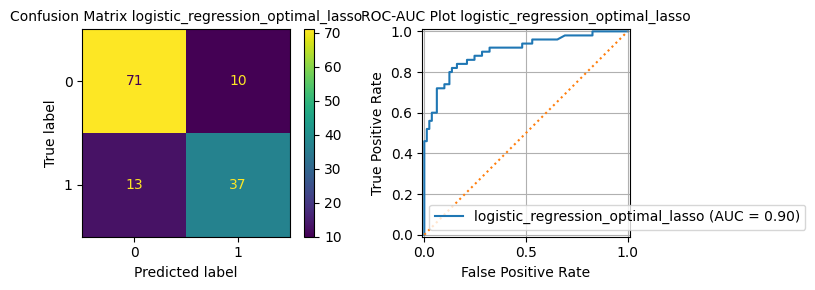

{'label': 'logistic_regression_optimal_lasso',
 'accuracy': 0.8244274809160306,
 'f1_score': 0.7628865979381443,
 'auc': np.float64(0.9025925925925926),
 'precision': 0.7872340425531915,
 'recall': 0.74}

In [ ]:
selected_model=df_results[df_results["label"]=="logistic_regression_optimal_lasso"].iloc[0]
# matrice de confusion du meilleur modèle de la permière vague
evaluate_model(selected_model.model, df_eval,
               list_feat, target, label=selected_model.label)

La diminution (légère) des performances par rapport au modèle plancher avec Lasso montre que cette méthode seule n'augmente pas les performances.

## Optimisation automatique du seuil

Puisque nous sommes dans une situation de modélisation déséquilibrée, le seuil par défaut de scikit-learn en classification de 0.5 nous paraît inapproprié. A cette étape, nous couplons l'optimisation automatique des hyperparamètres avec l'optimisation automatique des seuils pour maximiser le F1-Score. La méthode prend les modèles précédemment entraînés, puis teste tous les seuils entre 0 et 1 (avec un pas de 0.005) pour voir quel seuil de décision maximise le F1-Score.

In [ ]:
from sklearn.model_selection import TunedThresholdClassifierCV
from sklearn.metrics import make_scorer, f1_score

def tune_thresh_classifier(model_init, df, target):
    """
    Optimise le seuil de décision d'un modèle scikit-learn en utilisant la validation croisée.

    Paramètres :
    ----------
    model_init : estimable
        Le modèle de classification initial (doit être compatible avec scikit-learn).

    df : pandas.DataFrame
        Les données d'entraînement.

    target : str
        Le nom de la colonne cible dans le DataFrame "df".

    Retour :
    -------
    model : TunedThresholdClassifierCV
        Le modèle entraîné avec seuil optimisé par validation croisée.
    """
    model = TunedThresholdClassifierCV(model_init, scoring=make_scorer(f1_score, pos_label=1),
                                    cv=StratifiedKFold(10), thresholds=200)
    model.fit(df, df[target])
    return model

def tune_thresh_models(df_results, df_train, target, df_eval, list_feat):
    """
    Ajuste les seuils des modèles dans un DataFrame et évalue leurs performances.

    Paramètres :
    ----------
    df_results : pandas.DataFrame
        DataFrame contenant les modèles à ajuster dans la colonne "model".

    df_train : pandas.DataFrame
        Données d'entraînement utilisées pour l'ajustement des seuils.

    target : str
        Le nom de la colonne cible dans les données.

    df_eval : pandas.DataFrame
        Données utilisées pour l’évaluation des modèles ajustés.

    list_feat : list
        Liste des noms de colonnes/features utilisées pour l'entraînement et l'évaluation.

    Retour :
    -------
    df_results_thresh : pandas.DataFrame
        DataFrame contenant les modèles avec seuils ajustés et leurs scores de performance.
    """
    df_results_thresh=df_results.copy()
    df_results_thresh["model"]=df_results_thresh.model.apply(lambda x: tune_thresh_classifier(x, df_train, target))
    df_results_thresh["thresh"]=df_results_thresh.model.apply(lambda model:model.best_threshold_)
    scores_series=df_results_thresh.apply(lambda row: evaluate_model(row["model"], df_eval, list_feat, target,
                                                label=row["label"], plot=False, print_report=False), axis=1)

    df_results_thresh=df_results_thresh.drop(columns=["accuracy","f1_score","auc","precision","recall"]).merge(pd.DataFrame(list(scores_series)))
    df_results_thresh["label"]=df_results_thresh["label"]+"_thresh"
    return df_results_thresh

In [ ]:
# on ajuste les seuils des meilleurs modèles trouvés jusque là
df_results_thresh=tune_thresh_models(df_results, df_train, target, df_eval, list_feat)
df_results["thresh"]=0.5
df_results=pd.concat([df_results, df_results_thresh]).reset_index(drop=True)
df_results.to_pickle("/content/drive/My Drive/Projet CNAM/df_results_2.pkl")

              precision    recall  f1-score   support

           0       0.84      0.93      0.88        81
           1       0.86      0.72      0.78        50

    accuracy                           0.85       131
   macro avg       0.85      0.82      0.83       131
weighted avg       0.85      0.85      0.84       131



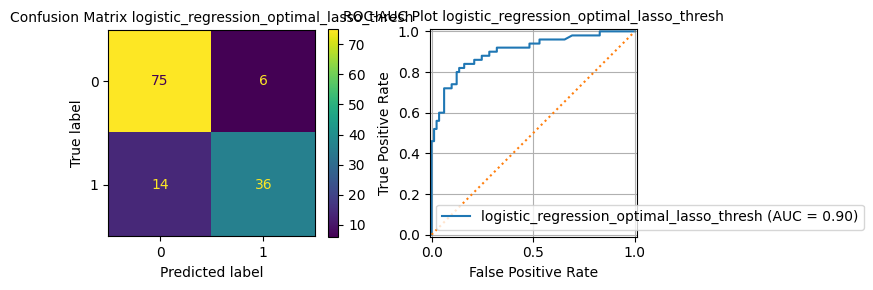

{'label': 'logistic_regression_optimal_lasso_thresh',
 'accuracy': 0.8473282442748091,
 'f1_score': 0.782608695652174,
 'auc': np.float64(0.9025925925925926),
 'precision': 0.8571428571428571,
 'recall': 0.72}

In [ ]:
# on affiche les résultats du meilleur modèle
df_results=df_results.sort_values(by=["f1_score", "precision",	"recall"], ascending=False)
evaluate_model(df_results.iloc[0].model, df_eval, list_feat, target, label=df_results.iloc[0].label)

Ceci dégrade légèrement la performance sur la classe minoritaire mais a pour effet d'augmenter légèrement le F1-Score à la sortie.

# Résultats finaux

En tête, Nous avons le modèle dit **logistic\_regression\_optimal\_lasso\_thresh**, pour "régression logistique à hyperparamètres optimaux avec imputation lasso de l'âge et optimisation automatique du seuil", suivi de la même chose sans imputation de l'âge, ce qui démontre tout de même la valeur des différentes méthodes appliquées pour gagner le 1\% supplémentaire de performance.


In [ ]:
df_results=df_results.sort_values(by=["f1_score", "precision",	"recall"], ascending=False)
df_results[["label", "accuracy","f1_score","auc","precision","recall"]]

,label,accuracy,f1_score,auc,precision,recall
6,logistic_regression_optimal_lasso_thresh,0.847328,0.782609,0.902593,0.857143,0.72
7,logistic_regression_optimal_thresh,0.847328,0.782609,0.902593,0.857143,0.72
1,baseline_lasso_imputation,0.832061,0.775510,0.902593,0.791667,0.76
0,baseline_Pipeline,0.824427,0.762887,0.901852,0.787234,0.74
2,logistic_regression_optimal_lasso,0.824427,0.762887,0.902593,0.787234,0.74
3,logistic_regression_optimal,0.824427,0.762887,0.902593,0.787234,0.74
4,baseline_Pipeline_thresh,0.824427,0.757895,0.901852,0.800000,0.72
5,baseline_lasso_imputation_thresh,0.824427,0.757895,0.902593,0.800000,0.72


# Interprétation de l'importance des variables explicatives

Le meilleur modèle est un modèle de régression logistique avec régularisation Lasso, avec imputation de l'âge avec régression lasso, suivie d'une optimisation automatique des hyperparamètres et d'une optimisation du seuil de décision. Visualiser ses coefficients nous permet de voir quelles classes le modèle a choisi de rapprocher de 0.


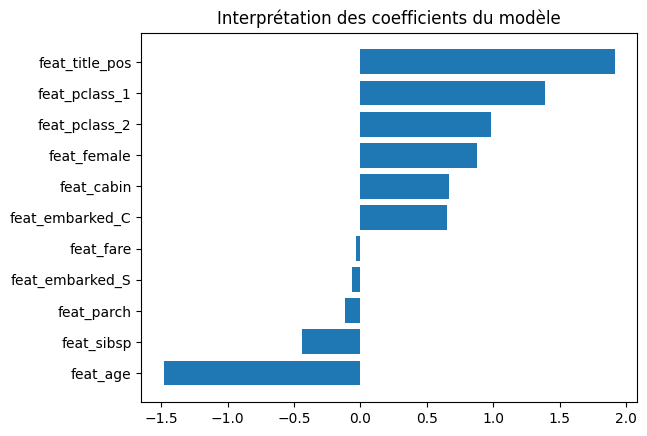

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

coef = df_results.iloc[0].model.estimator.steps[1][1].coef_
features_names = df_results.iloc[0].model.estimator.steps[0][1].list_feat

def f_importances(coef, names):
    """
    Affiche un barplot représentant l'importance
    (valeurs de coefficient) de chaque variable du modèle.

    Paramètres
    ----------
    coef : array-like de float
        Tableau des coefficients (importances) du modèle.
    names : list de str
        Liste des noms de variables correspondant à chaque coefficient.

    1. Trie les coefficients et les noms de variables par ordre croissant.
    2. Trace un barplot

    Exemple
    --------
    >>> coefs = [0.2, -0.5, 1.3]
    >>> features = ['age', 'taille', 'poids']
    >>> f_importances(coefs, features)
    """
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.title("Interprétation des coefficients du modèle")
    plt.show()

n_features = len(features_names)


f_importances(coef.sum(axis=0), features_names)

Sans surprise, il s'agit de variables corrélées avec les variables dont les coefficients sont grands, par exemple **feat_embarked_S** vs **feat_embarked_C**, et feat_fare vs **feat_pclass_1**. Il est intéressant de noter que  **feat_title_pos** et **feat_female**, fortement corrélées, ont toutes les deux des coefficients élevés - augmentant la probabilité de survie.


# Conclusion

Le projet montre l'efficacité initiale de la régression logistique pour la Classement binaire, et sa robustesse à des variables qualitatives et quantitatives avec des lois différentes différentes après un pré-traitement personnalisé. Il démontre également l'efficacité de la méthode Lasso associée à la régression logistique face à un colinéarité forte.

Il nous permet aussi d'étudier des façons différentes d'améliorer les performances d'un modèle: l'imputation de valeurs manquantes avec une régression Lasso, l'optimisation automatique des hyperparamètres et des seuils de décision, ainsi que leur impact sur la performance.
